# Dataset Dictionary

* **`crash_date`**: The date the accident occurred.
* **`traffic_control_device`**: The type of traffic control device involved (e.g., traffic light, sign).
* **`weather_condition`**: The weather conditions at the time of the accident.
* **`lighting_condition`**: The lighting conditions at the time of the accident.
* **`first_crash_type`**: The initial type of the crash (e.g., head-on, rear-end).
* **`trafficway_type`**: The type of roadway involved in the accident (e.g., highway, local road).
* **`alignment`**: The alignment of the road where the accident occurred (e.g., straight, curved).
* **`roadway_surface_cond`**: The condition of the roadway surface (e.g., dry, wet, icy).
* **`road_defect`**: Any defects present on the road surface.
* **`crash_type`**: The overall type of the crash.
* **`intersection_related_i`**: Whether the accident was related to an intersection.
* **`damage`**: The extent of the damage caused by the accident.
* **`prim_contributory_cause`**: The primary cause contributing to the crash.
* **`num_units`**: The number of vehicles involved in the accident.
* **`most_severe_injury`**: The most severe injury sustained in the crash.
* **`injuries_total`**: The total number of injuries reported.
* **`injuries_fatal`**: The number of fatal injuries resulting from the accident.
* **`injuries_incapacitating`**: The number of incapacitating injuries.
* **`injuries_non_incapacitating`**: The number of non-incapacitating injuries.
* **`injuries_reported_not_evident`**: The number of injuries reported but not visibly evident.
* **`injuries_no_indication`**: The number of cases with no indication of injury.
* **`crash_hour`**: The hour the accident occurred.
* **`crash_day_of_week`**: The day of the week the accident occurred.
* **`crash_month`**: The month the accident occurred.

# Libraries

In [ ]:
# Environment Setup & Library Imports

# Standard libraries for numerical computing and data manipulation
import numpy as np
import pandas as pd

# Libraries for static statistical data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Jupyter magic command to ensure static Matplotlib plots render inline
%matplotlib inline

# 1. Data Understanding

In [2]:
# Load the loan dataset
# We assign directly to 'df' as it is the standard naming convention for DataFrames
df = pd.read_csv('traffic_accidents.csv')

# Display the first few rows to verify the data loaded correctly
# .head() defaults to 5, keeping the code clean
df.head()

,crash_date,traffic_control_device,weather_condition,lighting_condition,first_crash_type,trafficway_type,alignment,roadway_surface_cond,road_defect,crash_type,...,most_severe_injury,injuries_total,injuries_fatal,injuries_incapacitating,injuries_non_incapacitating,injuries_reported_not_evident,injuries_no_indication,crash_hour,crash_day_of_week,crash_month
0,07/29/2023 01:00:00 PM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,TURNING,NOT DIVIDED,STRAIGHT AND LEVEL,UNKNOWN,UNKNOWN,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,3.0,13,7,7
1,08/13/2023 12:11:00 AM,TRAFFIC SIGNAL,CLEAR,"DARKNESS, LIGHTED ROAD",TURNING,FOUR WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,2.0,0,1,8
2,12/09/2021 10:30:00 AM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,REAR END,T-INTERSECTION,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,3.0,10,5,12
3,08/09/2023 07:55:00 PM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,ANGLE,FOUR WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,...,NONINCAPACITATING INJURY,5.0,0.0,0.0,5.0,0.0,0.0,19,4,8
4,08/19/2023 02:55:00 PM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,REAR END,T-INTERSECTION,STRAIGHT AND LEVEL,UNKNOWN,UNKNOWN,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,3.0,14,7,8


### Dataset structure

In [3]:
# 1. Structural Overview
# .info() is the most comprehensive quick-check function in Pandas.
# It validates:
#   - Data Types (Dtypes): Are numbers actually read as numbers?
#   - Completeness: Non-Null counts show us where data is missing.
#   - Memory Usage: Important for large datasets to prevent crashing the kernel.
df.info()

# 2. Dimension Check
# Returns a tuple (Rows, Columns).
# It is good practice to print this explicitly to confirm the volume of data loaded.
print(f"Dataset Shape: {df.shape}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209306 entries, 0 to 209305
Data columns (total 24 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   crash_date                     209306 non-null  object 
 1   traffic_control_device         209306 non-null  object 
 2   weather_condition              209306 non-null  object 
 3   lighting_condition             209306 non-null  object 
 4   first_crash_type               209306 non-null  object 
 5   trafficway_type                209306 non-null  object 
 6   alignment                      209306 non-null  object 
 7   roadway_surface_cond           209306 non-null  object 
 8   road_defect                    209306 non-null  object 
 9   crash_type                     209306 non-null  object 
 10  intersection_related_i         209306 non-null  object 
 11  damage                         209306 non-null  object 
 12  prim_contributory_cause       

**Conclusion**
* **Dimensions:** The dataset consists of **209,306 records** and **24 features**, providing a robust volume of data to establish statistical significance for risk analysis.
* **Completeness:** Initial inspection reveals **no technical missing values** (non-null counts match the total index for all columns). However, specific categorical analysis is required to detect if missing data is encoded as placeholders (e.g., "Unknown" or "N/A") rather than standard nulls.
* **Data Types:** The `crash_date` is currently stored as an `object` (string) and must be converted to `datetime` format to enable temporal feature engineering. Additionally, injury counts are stored as `float64`, which may be optimized to integers for consistency.

### Dataset stadistics

In [4]:
# Generate descriptive statistics for numerical columns and transpose the result for 
# better readability
df.describe(include='number').T

,count,mean,std,min,25%,50%,75%,max
num_units,209306.0,2.063300,0.396012,1.0,2.0,2.0,2.0,11.0
injuries_total,209306.0,0.382717,0.799720,0.0,0.0,0.0,1.0,21.0
injuries_fatal,209306.0,0.001859,0.047502,0.0,0.0,0.0,0.0,3.0
injuries_incapacitating,209306.0,0.038102,0.233964,0.0,0.0,0.0,0.0,7.0
injuries_non_incapacitating,209306.0,0.221241,0.614960,0.0,0.0,0.0,0.0,21.0
injuries_reported_not_evident,209306.0,0.121516,0.450865,0.0,0.0,0.0,0.0,15.0
injuries_no_indication,209306.0,2.244002,1.241175,0.0,2.0,2.0,3.0,49.0
crash_hour,209306.0,13.373047,5.603830,0.0,9.0,14.0,17.0,23.0
crash_day_of_week,209306.0,4.144024,1.966864,1.0,2.0,4.0,6.0,7.0
crash_month,209306.0,6.771822,3.427593,1.0,4.0,7.0,10.0,12.0


In [5]:
# Generate descriptive statistics for categorical columns (object type) and transpose 
# the result for better readability
df.describe(include='object').T

,count,unique,top,freq
crash_date,209306,189087,12/29/2020 05:00:00 PM,10
traffic_control_device,209306,19,TRAFFIC SIGNAL,123944
weather_condition,209306,12,CLEAR,164700
lighting_condition,209306,6,DAYLIGHT,134109
first_crash_type,209306,18,TURNING,64157
trafficway_type,209306,20,NOT DIVIDED,77753
alignment,209306,6,STRAIGHT AND LEVEL,204590
roadway_surface_cond,209306,7,DRY,155905
road_defect,209306,7,NO DEFECTS,171730
crash_type,209306,2,NO INJURY / DRIVE AWAY,117376


**Conclusion**

* **Severity Imbalance:** The dataset is heavily skewed towards non-severe incidents. The mean for `injuries_total` is approximately **0.38**, with a median of **0.0**. Furthermore, the most frequent value for `most_severe_injury` is "NO INDICATION OF INJURY" (154,789 cases). This confirms that fatal or incapacitating accidents are rare outliers (mean `injuries_fatal` is ~0.002), which will require specific handling (e.g., resampling) during the modeling phase to address class imbalance.
* **The "Ideal Conditions" Paradox:** Contrary to the assumption that bad weather drives accidents, the majority occur under optimal conditions: **"CLEAR" weather** (164,700 cases), **"DRY" road surfaces** (155,905 cases), and **"NO DEFECTS"** on the road (171,730 cases). This strongly suggests that human error or traffic volume plays a more significant role than environmental hazards.
* **Data Ambiguity in Causality:** A critical insight for the cleaning phase is that the top `prim_contributory_cause` is **"UNABLE TO DETERMINE"** (58,316 cases). This represents nearly 28% of the data, indicating a need to investigate the second most common causes to find actionable risk factors.
* **Typical Accident Profile:** The "average" crash involves **2 units** (likely a vehicle-to-vehicle collision), occurs around **1:20 PM** (`crash_hour` mean ~13.37), and results in property damage over $1,500.

### Missing Values Analysis

In [6]:
# Check for missing values in the dataset
# We calculate both the count and the percentage of nulls for each column
null_counts = df.isnull().sum()
null_percentages = (df.isnull().sum() / len(df)) * 100

# Create a summary DataFrame for better visualization
missing_data = pd.DataFrame({
    'Missing Count': null_counts,
    'Missing Percentage': null_percentages
}).sort_values(by='Missing Count', ascending=False)

# Filter to show only columns that actually have missing values
# This reduces noise in the report
missing_data[missing_data['Missing Count'] > 0]

,Missing Count,Missing Percentage


There are **no missing values** in any feature.
This suggests:

* synthetic or well-curated dataset
* no need for imputation strategies
* downstream analysis will be straightforward

In [7]:
def inspect_category_consistency(df):
    """
    Iterates through categorical columns and prints their unique values and counts.
    This helps identify inconsistencies (e.g., typos like 'High' vs 'high ') 
    without needing an external validation list.
    """
    
    # 1. Select only categorical columns
    cat_cols = df.select_dtypes(include='object').columns

    # 2. Iterate through columns (Standard Pandas approach)
    # We avoid looping through rows to maintain high performance
    for col in cat_cols:
        print(f"--- Distribution for: {col} ---")
        
        # 3. Display value counts
        # We use dropna=False to ensure we also see if there are Missing Values (NaN)
        # We verify if there are duplicate categories due to casing (e.g., 'A' vs 'a')
        print(df[col].value_counts(dropna=False))
        print("\n") # Blank line for better readability

# Execute the function to audit the data
inspect_category_consistency(df)

--- Distribution for: crash_date ---
12/29/2020 05:00:00 PM    10
02/17/2022 03:30:00 PM     8
06/05/2021 01:00:00 PM     6
06/17/2019 04:30:00 PM     6
12/29/2020 05:30:00 PM     6
                          ..
08/07/2024 06:21:00 PM     1
12/01/2018 10:30:00 PM     1
08/15/2017 09:20:00 PM     1
05/05/2021 07:05:00 PM     1
04/17/2017 05:15:00 PM     1
Name: crash_date, Length: 189087, dtype: int64


--- Distribution for: traffic_control_device ---
TRAFFIC SIGNAL              123944
STOP SIGN/FLASHER            49139
NO CONTROLS                  29508
UNKNOWN                       4455
OTHER                          670
YIELD                          468
PEDESTRIAN CROSSING SIGN       247
OTHER REG. SIGN                181
LANE USE MARKING               153
FLASHING CONTROL SIGNAL        150
POLICE/FLAGMAN                 104
OTHER WARNING SIGN              95
RAILROAD CROSSING GATE          78
SCHOOL ZONE                     33
OTHER RAILROAD CROSSING         23
RR CROSSING SIGN     

There are **no missing values** in any feature.
This suggests:

* synthetic or well-curated dataset
* no need for imputation strategies
* downstream analysis will be straightforward

# 2. Data Cleaning

Following the initial data inspection, we proceed with essential data type transformations to ensure data consistency. This step focuses on:

1.  **Temporal Conversion:** Transforming `crash_date` into datetime objects to enable downstream time-series analysis (e.g., extracting hour, day of week).
2.  **Logical Casting:** Converting injury count variables from floats to integers, as the number of individuals involved in an accident represents discrete data.

In [8]:
# 1. Convert 'crash_date' to datetime objects for temporal analysis
df['crash_date'] = pd.to_datetime(df['crash_date'])

# 2. Cast injury columns from float to int
# (Person counts must be represented as integers)
injury_columns = [
    'injuries_total',
    'injuries_fatal',
    'injuries_incapacitating',
    'injuries_non_incapacitating',
    'injuries_reported_not_evident',
    'injuries_no_indication']

df[injury_columns] = df[injury_columns].astype('int64')

# Verify the changes in data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209306 entries, 0 to 209305
Data columns (total 24 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   crash_date                     209306 non-null  datetime64[ns]
 1   traffic_control_device         209306 non-null  object        
 2   weather_condition              209306 non-null  object        
 3   lighting_condition             209306 non-null  object        
 4   first_crash_type               209306 non-null  object        
 5   trafficway_type                209306 non-null  object        
 6   alignment                      209306 non-null  object        
 7   roadway_surface_cond           209306 non-null  object        
 8   road_defect                    209306 non-null  object        
 9   crash_type                     209306 non-null  object        
 10  intersection_related_i         209306 non-null  object        
 11  

# 3. Exploratory Data Analysis (EDA)

In [13]:
import matplotlib.patches as mpatches
import matplotlib.lines as mlines 

# Helper Functions for Visualization

def add_mean_legend(ax, df, col):
    """
    Calculates the mean and displays it in the legend ONLY.
    Does not plot a vertical line on the graph.
    """
    # 1. Calculate the mean value
    mean_val = df[col].mean()
    
    # 2. Create a custom handle for the legend (Proxy Artist)
    # We create a Line2D with empty data lists ([], []). 
    # It won't appear on the plot, but creates the icon for the legend.
    legend_handle = mlines.Line2D([], [], color='blue', label=f"Mean: {mean_val:.2f}")

    # 3. Draw the legend outside the plot area
    # We explicitly pass the handle list containing our proxy artist
    ax.legend(handles=[legend_handle],title=col.replace('_', ' ').title(),bbox_to_anchor=(1.05, 1), loc="upper left")

def add_percentage_legend(ax, df, col):
    """
    Creates a custom legend sorted by percentage (descending).
    Useful for categorical plots where exact values matter.
    """
    # 1. Calculate frequency percentages for each category
    # normalize=True gives fractions, *100 converts to percentage
    counts = (df[col].value_counts(normalize=True) * 100).sort_values(ascending=False)
    sorted_cats = counts.index.tolist()

    # 2. Map existing bar colors to categories
    bar_colors = {}
    
    # Check if the plot has patches before iterating (safety check)
    if ax.patches:
        # Note: This assumes the order of patches matches the order of xticklabels
        for patch, xtick in zip(ax.patches, ax.get_xticklabels()):
            cat = xtick.get_text()
            bar_colors[cat] = patch.get_facecolor()

    # 3. Create custom handles for the legend
    # We loop through our sorted categories to ensure the legend is ordered by importance (%)
    legend_handles = []
    legend_labels = []
    
    for cat in sorted_cats:
        if cat in bar_colors:
            label = f"{cat}: {counts[cat]:.1f}%"
            legend_labels.append(label)
            # Create a localized patch for the legend
            legend_handles.append(mpatches.Patch(color=bar_colors[cat], label=label))

    # 4. Draw the legend outside the plot area
    if legend_handles:
        ax.legend(
            handles=legend_handles,
            title=col.replace('_', ' ').title(),
            bbox_to_anchor=(1.05, 1),
            loc="upper left")

To avoid a disorganized analysis of the 24 available columns, we implement a **semantic segmentation strategy**. We group the features into five logical domains (Temporal, Environmental, Infrastructure, Mechanics, and Severity). This structure allows us to systematically validate hypotheses for each aspect of the traffic ecosystem rather than analyzing variables in isolation.

In [39]:
# Feature Segmentation for Organized EDA
# We group columns based on their semantic domain to structure the analysis.

feature_groups = {
    # 1. Temporal Features: When did it happen?
    'temporal': [
        #'crash_date', 
        'crash_hour', 
        'crash_day_of_week', 
        'crash_month'],

    # 2. Environmental & Road Conditions: External factors
    'environmental': [
        'weather_condition', 
        'lighting_condition', 
        'roadway_surface_cond', 
        'road_defect'],

    # 3. Infrastructure & Location: Where did it happen?
    'infrastructure': [
        'traffic_control_device', 
        'trafficway_type', 
        'alignment', 
        'intersection_related_i'],

    # 4. Accident Mechanics & Causality: How and Why?
    'mechanics': [
        'first_crash_type', 
        'crash_type', 
        'prim_contributory_cause', 
        'num_units', 
        'damage'],

    # 5. Severity & Outcomes: The Impact (Target Variables)
    'severity': [
        'most_severe_injury']}

### 📉 Visualization Strategy: Handling High Cardinality & Long Tails

In this analysis, several categorical features (such as `traffic_control_device` or `prim_contributory_cause`) exhibit **high cardinality**, meaning they contain a large number of unique values. The distribution of these features typically follows a "long tail" pattern, where a few major categories account for the majority of cases, while dozens of rare categories represent negligible fractions of the data (often < 1%).

To ensure the visualizations remain **readable and actionable**, a **3% frequency threshold** was applied to the count plots.

**Justification for this approach:**
1.  **Noise Reduction:** By filtering out categories that represent less than 3% of the total dataset, we eliminate visual clutter caused by rare events (e.g., "Blowing Sand" weather or specific obscure traffic signs).
2.  **Focus on Drivers:** The goal of this EDA is to identify the *primary* drivers of accidents. Categories falling below this threshold are statistically insignificant for general risk profiling and would distract from the dominant patterns.
3.  **Data Quality:** Extremely low-frequency categories often contain data entry errors or "Other" classifications that provide limited analytical value.

*Note: The complete distribution remains available in the raw data tables; this filter is strictly for visualization clarity.*

## Temporal Features: When did it happen?

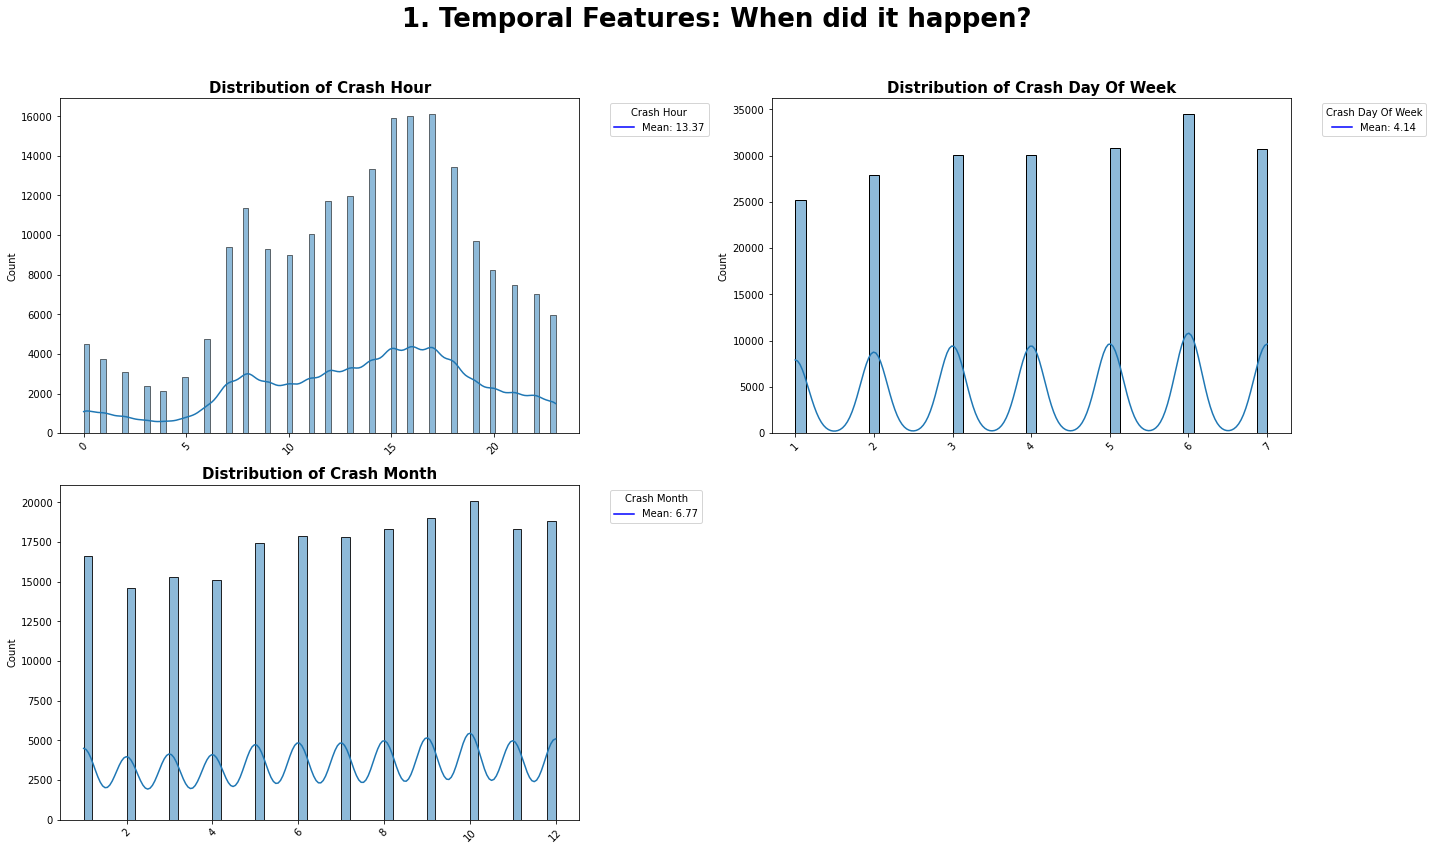

In [56]:
# Define the subset of temporal columns to visualize
cols_to_plot = feature_groups['temporal']

# Calculate the dimensions of the subplot grid based on the number of columns
n_cols = 2
n_rows = (len(cols_to_plot) + n_cols - 1) // n_cols

# Initialize the figure and axes
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 12))
axes = axes.flatten()

# Iterate through each feature and its corresponding axis
for ax, col in zip(axes, cols_to_plot):

    # Check if the column is numeric
    if pd.api.types.is_numeric_dtype(df[col]):
        # Plot histogram with Kernel Density Estimate (KDE) for numeric features
        sns.histplot(df[col], kde=True, ax=ax)
        add_mean_legend(ax, df, col)

    else:
        # --- START OF FILTER (>= 3%) ---
        # 1. Calculate relative frequencies of each category
        freqs = df[col].value_counts(normalize=True)
        
        # 2. Identify categories exceeding the 3% threshold (0.03)
        # Note: This reduces visual noise from low-frequency categories
        valid_cats = freqs[freqs >= 0.03].index
        
        # 3. Filter the dataset to include only these significant categories
        plot_data = df[df[col].isin(valid_cats)]
        
        # 4. Generate the count plot using the subset, ordering categories by frequency (descending)
        sns.countplot(x=plot_data[col], ax=ax, order=valid_cats)
        
        # Important: Pass the filtered 'plot_data' to the legend function so that
        # percentages are calculated based on the data visible in the plot.
        add_percentage_legend(ax, plot_data, col)
        # --- END OF FILTER ---

    # Customize plot aesthetics
    ax.set_title(f"Distribution of {col.replace('_', ' ').title()}", fontsize=15, fontweight='bold')
    ax.tick_params(axis='x', rotation=45)
    ax.set_xlabel("")

# Hide any unused axes in the grid
for ax in axes[len(cols_to_plot):]:
    ax.axis('off')

# Set the global title and adjust layout
fig.suptitle('1. Temporal Features: When did it happen?', fontsize=26, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

### **Image 1. Temporal Features: When did it happen?**

**Key Insights:**
* **Peak Risk Window:** The highest frequency of crashes occurs between **15:00 and 18:00**, coinciding with the evening rush hour.
* **Weekly Trend:** **Friday** is the most dangerous day of the week, likely due to accumulated fatigue and increased weekend travel volume.
* **Seasonal Spike:** There is a noticeable upward trend in accidents during the **fourth quarter (October–December)**.

The temporal data strongly suggests that accidents are closely tied to routine human activity rather than random occurrences. The distinct spike during the late afternoon implies that traffic congestion, combined with driver fatigue after the workday, creates the perfect storm for incidents. The morning rush hour shows a smaller peak, suggesting that drivers may be more alert or cautious at the start of the day compared to the end.

Furthermore, the seasonal increase towards the end of the year could be attributed to shorter daylight hours and the holiday season rush. This pattern indicates that traffic management resources should be prioritized during weekday evenings and the late-year months to effectively mitigate risk.

## Environmental & Road Conditions: External factors

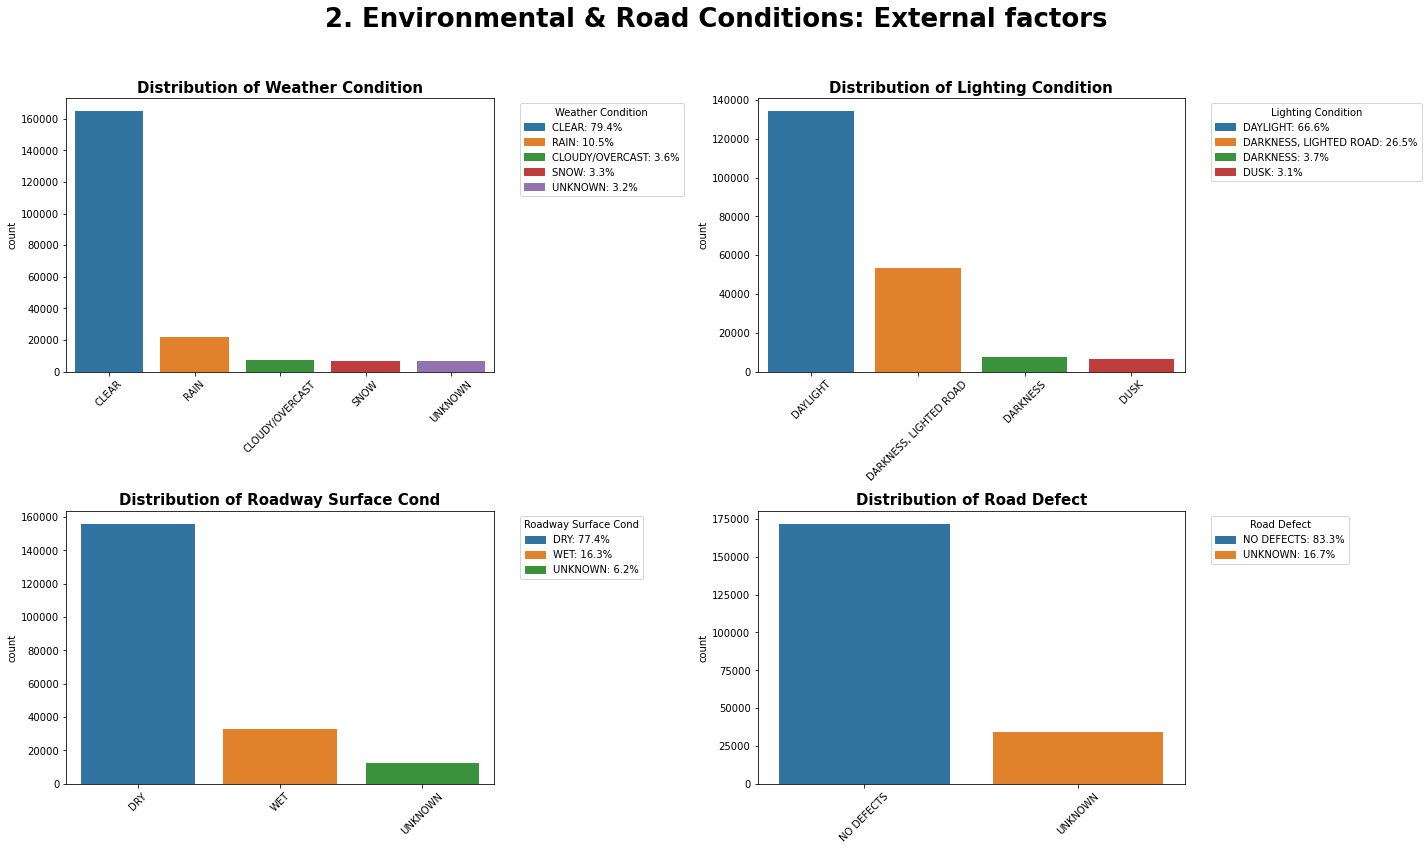

In [57]:
# Select the 'environmental' feature group for visualization
cols_to_plot = feature_groups['environmental']

# Determine grid dimensions for subplots
n_cols = 2
n_rows = (len(cols_to_plot) + n_cols - 1) // n_cols

# Initialize figure and axes
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 12))
axes = axes.flatten()

# Iterate over selected columns to create individual plots
for ax, col in zip(axes, cols_to_plot):

    if pd.api.types.is_numeric_dtype(df[col]):
        # Plot histogram for numeric variables
        sns.histplot(df[col], kde=True, ax=ax)
        add_mean_legend(ax, df, col)

    else:
        # --- START OF FILTER (>= 3%) ---
        # 1. Calculate relative frequencies
        freqs = df[col].value_counts(normalize=True)
        
        # 2. Identify categories exceeding the 3% threshold (0.03)
        valid_cats = freqs[freqs >= 0.03].index
        
        # 3. Filter data to include only these specific categories
        plot_data = df[df[col].isin(valid_cats)]
        
        # 4. Plot using the subset and enforce descending order
        sns.countplot(x=plot_data[col], ax=ax, order=valid_cats)
        
        # Important: Pass 'plot_data' to the legend function to ensure 
        # percentages are calculated based on the visible data.
        add_percentage_legend(ax, plot_data, col)
        # --- END OF FILTER ---

    # Set plot titles and axis parameters
    ax.set_title(f"Distribution of {col.replace('_', ' ').title()}", fontsize=15, fontweight='bold')
    ax.tick_params(axis='x', rotation=45)
    ax.set_xlabel("")

# Hide unused axes
for ax in axes[len(cols_to_plot):]:
    ax.axis('off')

# Set global title and adjust layout
fig.suptitle('2. Environmental & Road Conditions: External factors', fontsize=26, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

### **Image 2. Environmental & Road Conditions: External factors**

**Key Insights:**
* **Optimal Conditions:** The vast majority of accidents occur during **Clear weather (79.4%)** and on **Dry road surfaces (77.4%)**.
* **Visibility:** Most crashes happen during **Daylight (66.6%)**, ruling out poor visibility as a primary driver.
* **Road Quality:** Infrastructure defects are negligible, with **83.3%** of cases reporting "No Defects."

Contrary to the common assumption that adverse weather drives accident rates, the data reveals that most incidents happen under "perfect" driving conditions. This is a critical finding: it shifts the focus of causality away from external factors (like rain, snow, or potholes) and squarely onto human behavior.

When conditions are good, drivers often feel a false sense of security, potentially leading to higher speeds or lower attention levels. Since the environment is rarely the culprit, safety interventions should focus on driver education and enforcement rather than road surface improvements.

## Infrastructure & Location: Where did it happen?

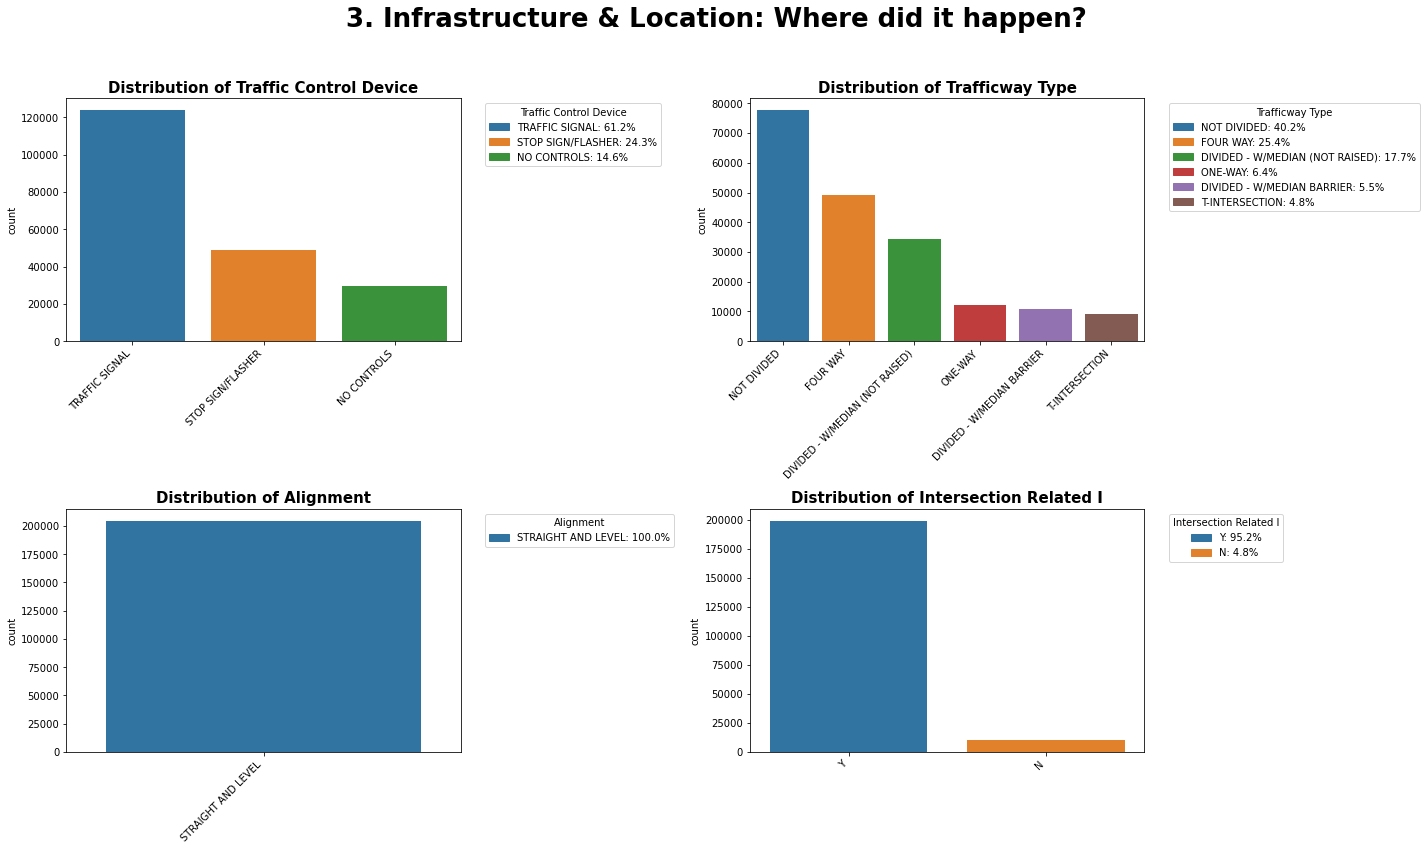

In [62]:
# Select the 'infrastructure' feature group for visualization
cols_to_plot = feature_groups['infrastructure']

# Determine grid dimensions for subplots
n_cols = 2
n_rows = (len(cols_to_plot) + n_cols - 1) // n_cols

# Initialize figure and axes
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 12))
axes = axes.flatten()

# Iterate over selected columns to create individual plots
for ax, col in zip(axes, cols_to_plot):

    if pd.api.types.is_numeric_dtype(df[col]):
        # Plot histogram for numeric variables
        sns.histplot(df[col], kde=True, ax=ax)
        add_mean_legend(ax, df, col)

    else:
        # --- START OF FILTER (>= 3%) ---
        # 1. Calculate relative frequencies
        freqs = df[col].value_counts(normalize=True)
        
        # 2. Identify categories exceeding the 3% threshold (0.03)
        valid_cats = freqs[freqs >= 0.03].index
        
        # 3. Filter the dataset to include only these specific categories
        plot_data = df[df[col].isin(valid_cats)]
        
        # 4. Plot using the subset and enforce descending order
        sns.countplot(x=plot_data[col], ax=ax, order=valid_cats)
        
        # Important: Pass 'plot_data' to the legend function to ensure 
        # percentages are calculated based on the visible data.
        add_percentage_legend(ax, plot_data, col)
        # --- END OF FILTER ---

    # Set plot titles
    ax.set_title(f"Distribution of {col.replace('_', ' ').title()}", fontsize=15, fontweight='bold')
    
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
    
    ax.set_xlabel("")

# Hide unused axes
for ax in axes[len(cols_to_plot):]:
    ax.axis('off')

# Set global title and adjust layout
fig.suptitle('3. Infrastructure & Location: Where did it happen?', fontsize=26, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

### **Image 3. Infrastructure & Location: Where did it happen?**

**Key Insights:**
* **The Danger Zone:** A staggering **95.2%** of accidents are classified as **"Intersection Related."**
* **Control Devices:** The majority of incidents (61.2%) occur at locations controlled by **Traffic Signals**.
* **Road Geometry:** Nearly 100% of crashes occur on **"Straight and Level"** roads, indicating that difficult terrain (curves/hills) is not a factor.

The infrastructure analysis highlights that accidents are overwhelmingly concentrated at conflict points—specifically intersections—rather than on open stretches of road. The fact that most crashes happen on straight roads with traffic signals suggests that the issue isn't the road layout itself, but how drivers navigate the complex interactions required at crossings.

This implies that despite the presence of control devices (signals), drivers are failing to negotiate right-of-way correctly. Future safety measures might need to look beyond simple signaling and consider traffic calming measures or roundabout implementations to reduce the severity of these intersection conflicts.

## Accident Mechanics & Causality: How and Why?

C:\Users\Trolo\AppData\Local\Temp\ipykernel_9248\2485769905.py:46: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


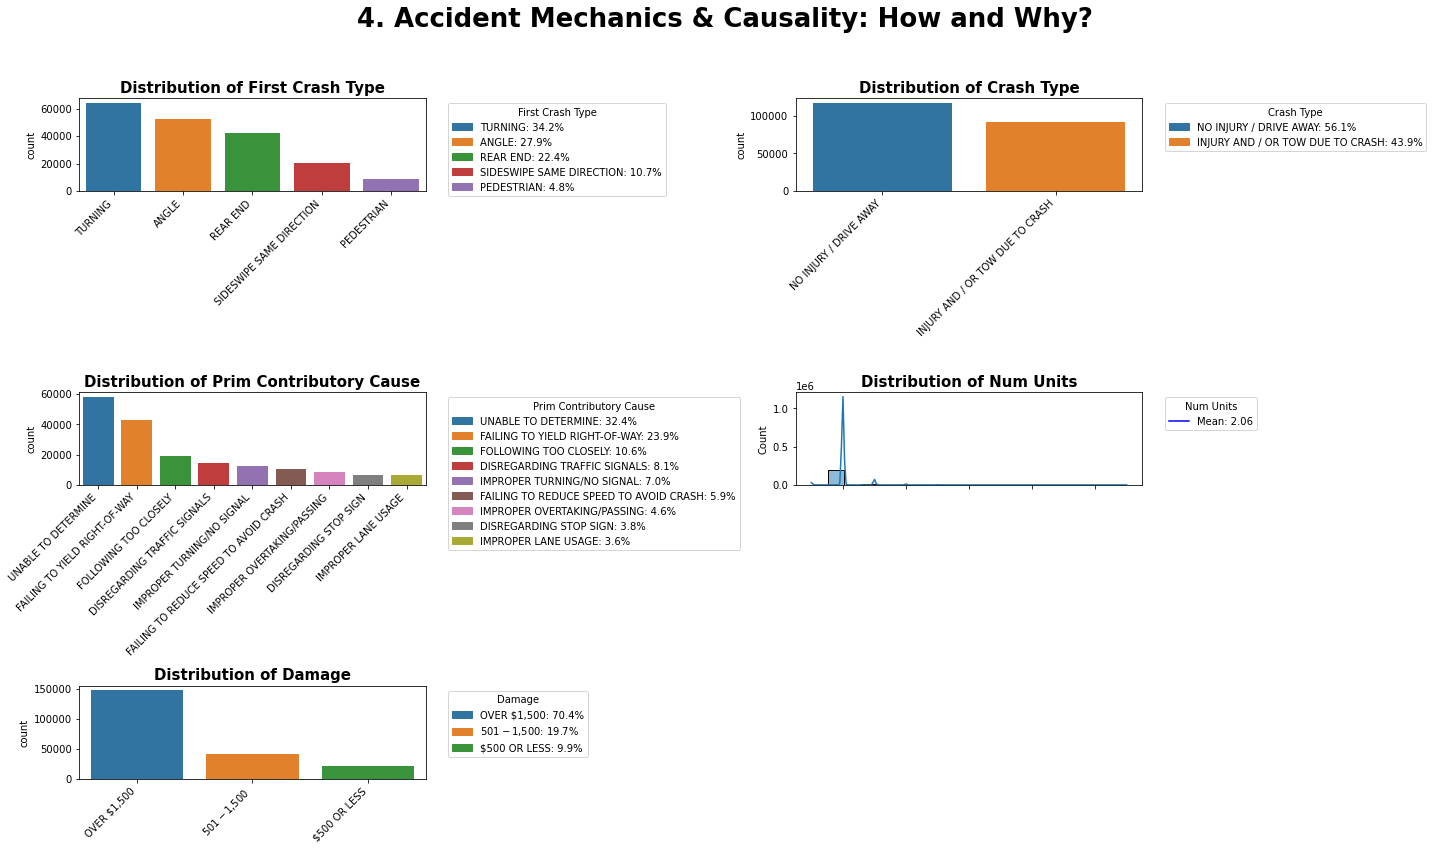

In [63]:
# Select the 'mechanics' feature group for visualization
cols_to_plot = feature_groups['mechanics']

# Determine grid dimensions for subplots
n_cols = 2
n_rows = (len(cols_to_plot) + n_cols - 1) // n_cols

# Initialize figure and axes
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 12))
axes = axes.flatten()

# Iterate over selected columns to create individual plots
for ax, col in zip(axes, cols_to_plot):

    if pd.api.types.is_numeric_dtype(df[col]):
        # Plot histogram for numeric variables
        sns.histplot(df[col], kde=True, ax=ax)
        add_mean_legend(ax, df, col)

    else:
        # --- START OF FILTER (>= 3%) ---
        # 1. Calculate relative frequencies
        freqs = df[col].value_counts(normalize=True)
        
        # 2. Identify categories exceeding the 3% threshold (0.03)
        valid_cats = freqs[freqs >= 0.03].index
        
        # 3. Filter the dataset to include only these specific categories
        plot_data = df[df[col].isin(valid_cats)]
        
        # 4. Plot using the subset and enforce descending order
        sns.countplot(x=plot_data[col], ax=ax, order=valid_cats)
        
        # Important: Pass 'plot_data' to the legend function to ensure 
        # percentages are calculated based on the visible data.
        add_percentage_legend(ax, plot_data, col)
        # --- END OF FILTER ---

    # Set plot titles
    ax.set_title(f"Distribution of {col.replace('_', ' ').title()}", fontsize=15, fontweight='bold')
    

    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
    
    ax.set_xlabel("")

# Hide unused axes
for ax in axes[len(cols_to_plot):]:
    ax.axis('off')

# Set global title and adjust layout
fig.suptitle('4. Accident Mechanics & Causality: How and Why?', fontsize=26, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

### **Image 4. Accident Mechanics & Causality: How and Why?**

**Key Insights:**
* **Collision Type:** **"Turning" (34.2%)** and **"Angle" (27.9%)** are the most common crash types, consistent with intersection scenarios.
* **Primary Cause:** The leading identified cause is **"Failing to Yield Right-of-Way" (23.9%)**, followed by "Following Too Closely."
* **Economic Impact:** The majority of accidents result in significant property damage (**> $1,500**).

The mechanics of these accidents reinforce the findings from the location analysis. The dominance of "Turning" and "Angle" crashes confirms that vehicles are colliding while crossing paths, rather than side-swiping or hitting head-on.

The causality data points directly to aggressive or inattentive driving behaviors. "Failing to yield" and "Following too closely" are preventable human errors that typically occur in congested traffic. This suggests that while the roads are physically safe (as seen in Image 2), the social interaction between drivers is the weak link in the system.

## Severity & Outcomes: The Impact

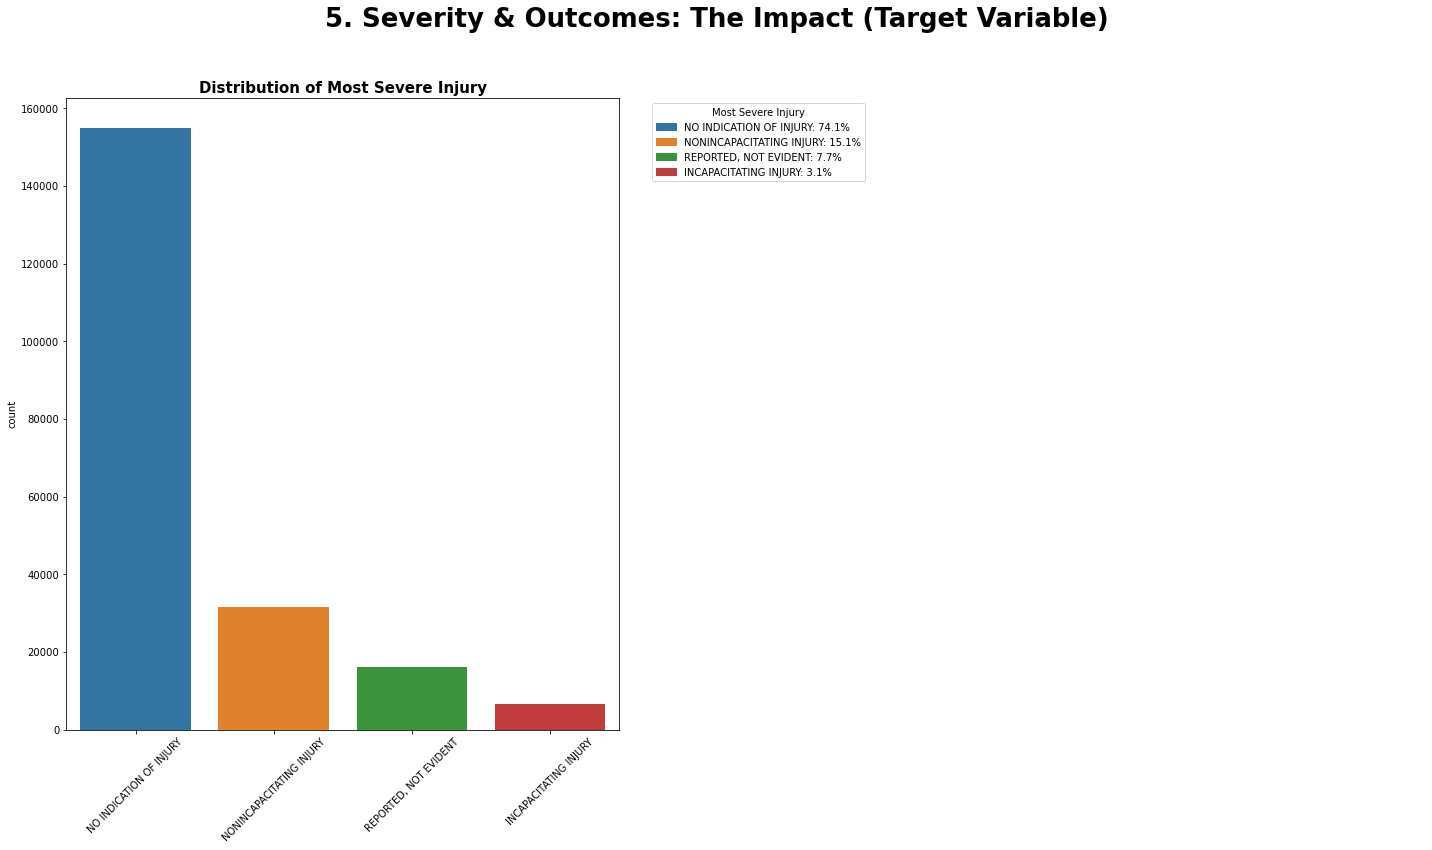

In [60]:
# Select the 'severity' feature group to analyze impact outcomes (Target Variables)
cols_to_plot = feature_groups['severity']

# Determine grid dimensions for subplots
n_cols = 2
n_rows = (len(cols_to_plot) + n_cols - 1) // n_cols

# Initialize figure and axes
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 12))
axes = axes.flatten()

# Iterate over selected columns to create individual plots
for ax, col in zip(axes, cols_to_plot):

    if pd.api.types.is_numeric_dtype(df[col]):
        # Plot histogram for numeric variables (e.g., total injuries)
        sns.histplot(df[col], kde=True, ax=ax)
        add_mean_legend(ax, df, col)

    else:
        # --- START OF FILTER (>= 3%) ---
        # 1. Calculate relative frequencies
        freqs = df[col].value_counts(normalize=True)
        
        # 2. Identify categories exceeding the 3% threshold (0.03)
        # This helps focus on the most common severity outcomes
        valid_cats = freqs[freqs >= 0.03].index
        
        # 3. Filter the dataset to include only these specific categories
        plot_data = df[df[col].isin(valid_cats)]
        
        # 4. Plot using the subset and enforce descending order
        sns.countplot(x=plot_data[col], ax=ax, order=valid_cats)
        
        # Important: Pass 'plot_data' to the legend function to ensure 
        # percentages are calculated based on the visible data.
        add_percentage_legend(ax, plot_data, col)
        # --- END OF FILTER ---

    # Set plot titles and axis parameters
    ax.set_title(f"Distribution of {col.replace('_', ' ').title()}", fontsize=15, fontweight='bold')
    ax.tick_params(axis='x', rotation=45)
    ax.set_xlabel("")

# Hide unused axes
for ax in axes[len(cols_to_plot):]:
    ax.axis('off')

# Set global title and adjust layout
fig.suptitle('5. Severity & Outcomes: The Impact (Target Variable)', fontsize=26, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

### **Image 5. Severity & Outcomes: The Impact**

**Key Insights:**
* **Low Physical Harm:** **74.1%** of accidents resulted in **"No Indication of Injury,"** suggesting most crashes are minor.
* **Rare Severe Outcomes:** Incapacitating injuries account for only **3.1%** of the total cases.
* **High Frequency / Low Severity:** The dataset represents a high volume of "fender benders" rather than catastrophic collisions.

The severity distribution paints a picture of a high-frequency but generally low-impact accident profile. While the sheer number of accidents is concerning, the fact that three-quarters of them involve no injuries indicates that vehicle safety systems are working or that the collisions are happening at relatively low speeds (typical of intersection traffic).

# 4. Risk & Accident Insights

**Feature Engineering: Removal of Data Leakage**

We have excluded specific injury-related columns (e.g., injuries_total, injuries_fatal, injuries_incapacitating) from the feature set. These variables act as post-event outcomes rather than pre-event predictors.

Since our target variable (most_severe_injury) is directly derived from or highly correlated with these metrics, including them would introduce Target Leakage.

## Correlation Map

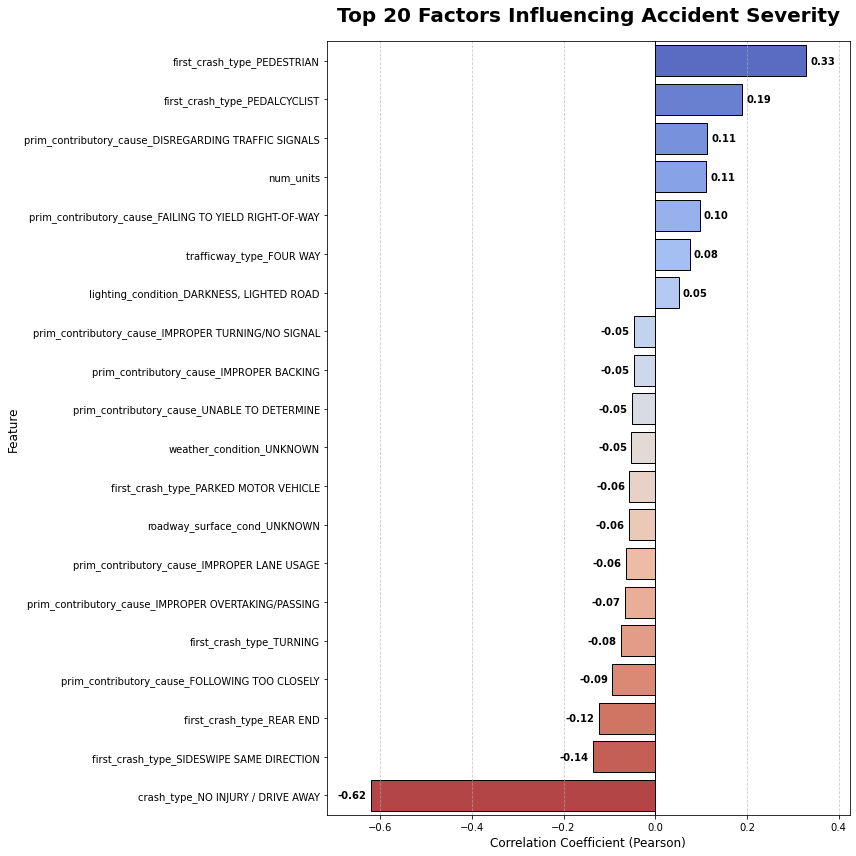

In [65]:
# 1. PREPROCESSING & ENCODING
df_encoded = df.copy()

# Drop injury-count columns to prevent Data Leakage.
cols_to_drop = ['injuries_total','injuries_fatal','injuries_incapacitating',
                'injuries_non_incapacitating','injuries_reported_not_evident',
                'injuries_no_indication']
df_encoded.drop(cols_to_drop, axis=1, inplace=True)

# A. Manual Mapping
severity_map = {
    'NO INDICATION OF INJURY': 0,
    'REPORTED, NOT EVIDENT': 1,     
    'NONINCAPACITATING INJURY': 2,  
    'INCAPACITATING INJURY': 3,     
    'FATAL': 4}
df_encoded['most_severe_injury'] = df_encoded['most_severe_injury'].map(severity_map)

damage_map = {
    '$500 OR LESS': 0,
    '$501 - $1,500': 1,
    'OVER $1,500': 2}
df_encoded['damage'] = df_encoded['damage'].map(damage_map)

# B. Temporal Feature Engineering
if 'crash_date' in df_encoded.columns:
    df_encoded['crash_date'] = pd.to_datetime(df_encoded['crash_date'])
    df_encoded['crash_hour'] = df_encoded['crash_date'].dt.hour
    df_encoded['crash_day_of_week'] = df_encoded['crash_date'].dt.dayofweek
    df_encoded = df_encoded.drop('crash_date', axis=1)

# C. One-Hot Encoding
categorical_cols = [
    'traffic_control_device', 'weather_condition', 'lighting_condition',
    'first_crash_type', 'trafficway_type', 'alignment', 'roadway_surface_cond',
    'road_defect', 'intersection_related_i', 'prim_contributory_cause', 'crash_type']

df_encoded = pd.get_dummies(df_encoded, columns=categorical_cols, drop_first=True, dtype=int)
df_encoded = df_encoded.fillna(0)


# 2. CORRELATION CALCULATION & RANKING
target_col = 'most_severe_injury'
corr_with_target = df_encoded.corr()[[target_col]]
corr_with_target = corr_with_target.drop(target_col, axis=0)
corr_with_target['abs_corr'] = corr_with_target[target_col].abs()
top_features = corr_with_target.sort_values(by='abs_corr', ascending=False).head(20)
top_features = top_features.drop('abs_corr', axis=1).sort_values(by=target_col, ascending=False)


# 3. VISUALIZATION
plt.figure(figsize=(12, 12)) 

# Bar Plot
sns.barplot(
    x=top_features[target_col], 
    y=top_features.index, 
    palette='coolwarm', 
    edgecolor='black')

# Reference line at 0
plt.axvline(x=0, color='black', linestyle='-', linewidth=1)

# Aesthetics
plt.title('Top 20 Factors Influencing Accident Severity', fontsize=20, fontweight='bold', pad=20)
plt.xlabel('Correlation Coefficient (Pearson)', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)

# 4. FIXED LABELS ALIGNMENT
# Dynamic padding based on data range
min_corr = top_features[target_col].min()
max_corr = top_features[target_col].max()
padding = (max_corr - min_corr) * 0.1 

plt.xlim(min_corr - padding, max_corr + padding)

for i, v in enumerate(top_features[target_col]):
    # Si el valor es positivo:
    if v >= 0:
        offset = padding * 0.1
        align = 'left'  
    else:
        offset = - (padding * 0.1)
        align = 'right' 
    
    plt.text(v + offset, i, f"{v:.2f}", 
             va='center', 
             ha=align,   
             fontweight='bold', 
             fontsize=10)

plt.tight_layout()
plt.show()

### Conclusion: Analysis of Factors Influencing Accident Severity

The horizontal bar chart illustrates the top 20 features showing the strongest correlation (Pearson correlation coefficient) with accident severity. The analysis reveals key insights into the primary drivers of severe accidents:

1.  **Vulnerable Road Users represent the highest severity risk:** Accidents involving pedestrians and pedalcyclists show the strongest positive correlations with high severity. `first_crash_type_PEDESTRIAN` (0.33) and `first_crash_type_PEDALCYCLIST` (0.19) are the most critical factors, highlighting the extreme vulnerability of these groups and the urgent need for infrastructure and policy improvements to protect them.
2.  **Driver behavior and infrastructure interact to influence risk:**
    * **Positive correlations (Higher Severity):** Disregarding traffic signals (0.11), accidents at four-way intersections (0.08), and poor lighting conditions (`DARKNESS, LIGHTED ROAD`: 0.05) are associated with more severe outcomes.
    * **Negative correlations (Lower Severity):** Conversely, behaviors like improper turning (-0.05), improper backing (-0.05), and accidents classified as "No Injury / Drive Away" show a strong negative correlation (-0.62), as expected.
3.  **Specific collision types are less severe:** Common collision types such as rear-end collisions (-0.12) and sideswipe collisions in the same direction (-0.14) are significantly associated with lower severity outcomes, likely due to lower impact speeds.

In summary, this analysis strongly indicates that accident severity is most critically driven by the involvement of pedestrians and cyclists. Mitigating the risk for these vulnerable users should be a top priority for traffic safety initiatives.

# 5. Recommendations & Conclusions

This report synthesizes the analysis of over 200,000 historical accident records to identify the primary drivers of traffic incidents and injury severity. The data conclusively shifts the narrative from environmental hazards to human error and specific infrastructure conflict points.

### 🔑 Key Strategic Insights

1.  **The "Ideal Conditions" Paradox:** Over **79% of accidents occur in clear weather** and on dry roads. External factors like rain, snow, or road defects are negligible contributors. The primary risk factor is **human behavior** (inattention, aggression) operating under a false sense of security provided by good conditions.
2.  **Intersections are the Critical Conflict Point:** A staggering **95.2% of crashes are intersection-related**, primarily occurring on straight, level roads controlled by traffic signals. The infrastructure itself is stable, but the complex decision-making required at crossings is where drivers consistently fail.
3.  **Vulnerable Users Drive Severity:** While the vast majority of accidents (74%) result in no injuries (property damage only), the **severity skyrockets** when pedestrians (+0.33 correlation) or cyclists (+0.19 correlation) are involved. These are the single strongest predictors of critical outcomes.
4.  **Temporal Predictability:** Risk is highly predictable, peaking during the **evening rush hour (15:00–18:00)** and on **Fridays**. This correlates strongly with commuter fatigue and traffic density rather than random chance.

---

### 📉 Detailed Analysis & Conclusions

**1. Causality: The Human Element**
The mechanics of the accidents reveal a clear pattern of "preventable error." The most frequent crash types are **"Turning" (34%)** and **"Angle" (28%)**, which are direct consequences of the leading cause: **"Failing to Yield Right-of-Way" (24%)**. Drivers are colliding not because they lose control of the vehicle (as seen in head-on or fixed-object crashes), but because they misjudge gaps or ignore priority at controlled intersections.

**2. The Severity Gap**
The dataset exhibits a stark dichotomy between frequency and severity.
* **High Frequency / Low Severity:** Rear-end and sideswipe collisions are common but negatively correlated with severe injury (-0.12). These are likely low-speed "fender benders" in congestion.
* **Low Frequency / High Severity:** Pedestrian incidents are rarer but disproportionately catastrophic. The correlation analysis confirms that protecting vulnerable road users is the most effective lever for reducing fatalities, even if it doesn't significantly reduce the total number of crashes.

**3. Infrastructure & Policy Implications**
Since traffic signals are present in 61% of accidents, simply adding more signals is unlikely to improve safety. The data suggests that current signaling is either being ignored ("Disregarding Traffic Signals" correlates +0.11 with severity) or is insufficient to manage the conflict.

### ✅ Recommendations for Action

Based on these data-driven findings, the following interventions are recommended:
* **Traffic Calming at Intersections:** Since signals alone are not preventing right-of-way failures, physical infrastructure changes like **roundabouts** or **protected left-turn phases** should be prioritized to reduce the possibility of high-impact Angle crashes.
* **Vulnerable User Protection:** Implement dedicated infrastructure (protected bike lanes, raised crosswalks) to physically separate pedestrians from vehicles, as this is the primary driver of severe injuries.
* **Targeted Enforcement:** Deploy traffic enforcement resources specifically during **Friday evenings (15:00-18:00)** to counter the peak in aggressive driving behaviors fueled by fatigue and congestion.